In [ ]:
# This is a Python 3 environment

# Base level imports for data science work
import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path
from json import decoder
import glob, os, json
import re

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  dfh = pd.DataFrame(similarity)
  #df.columns = labels
  #df.index = labels
  fig, ax = plt.subplots(figsize=(16,9))
  sns.heatmap(dfh, cmap=cmap)

In [ ]:
#Herunterladen des Data Frame
df = pd.read_csv("https://chruezfalsch.ch/df_ba_cleaned.csv")
del df['Unnamed: 0'] 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


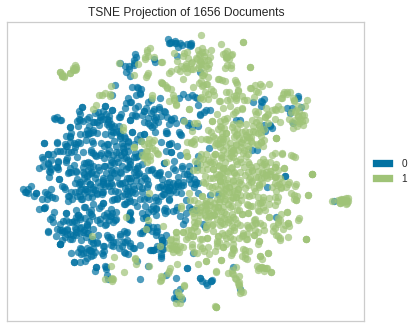

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = df
cv_bla=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))

X = cv_bla.fit_transform(corpus.text)
y = corpus.fake

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


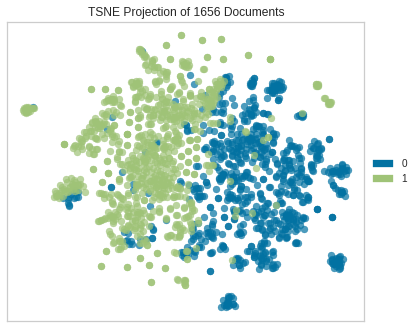

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = df
cv_bla= TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))

X = cv_bla.fit_transform(corpus.text)
y = corpus.fake

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

In [ ]:
df_faketext=df[df.fake == 1]
df_realtext=df[df.fake == 0]

faketext=df[df.fake == 1].text
realtext=df[df.fake == 0].text
#########
indnex_realtext=df_realtext.index
indnex_faketext=df_faketext.index

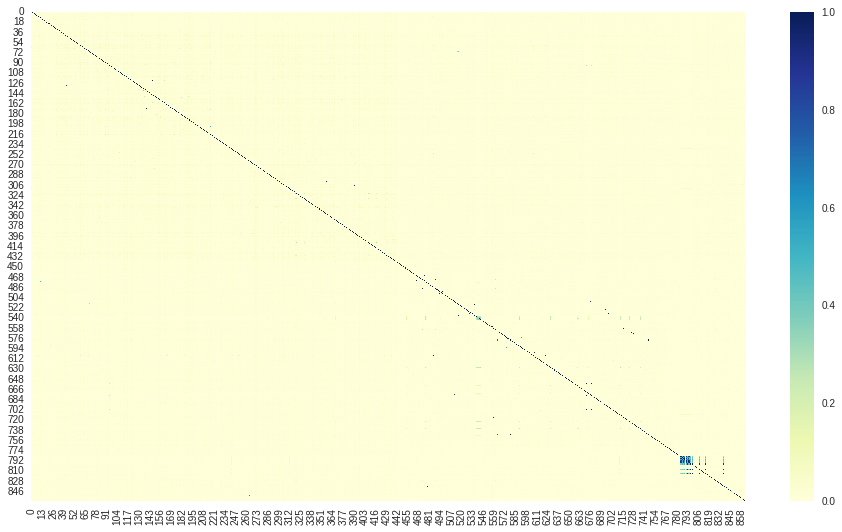

In [ ]:
#cosin simularity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
X = vectorizer.fit_transform(faketext)
arr = X.toarray()
cosinsimilarity_fake=cosine_similarity(arr)
create_heatmap(cosinsimilarity_fake)

In [ ]:
#cosinsimilarity = cosine_similarity(arr)
i=0
b=0
remover=[]

for bla in  cosinsimilarity_fake:
    b=0
    if indnex_faketext[i] not in remover:
      for ba in bla:
        if b!=i:
          if ba>0.5:
            if indnex_faketext[b] not in remover:
              remover.append(indnex_faketext[b])
        b=b+1
    i=i+1
for dd in remover:
  df_faketext=df_faketext.drop(dd)

print(len(remover), "Werte wurden entfernt.", "es wurden foglende Werte entfernt")

diff_df = df_faketext

51 Werte wurden entfernt. es wurden foglende Werte entfernt


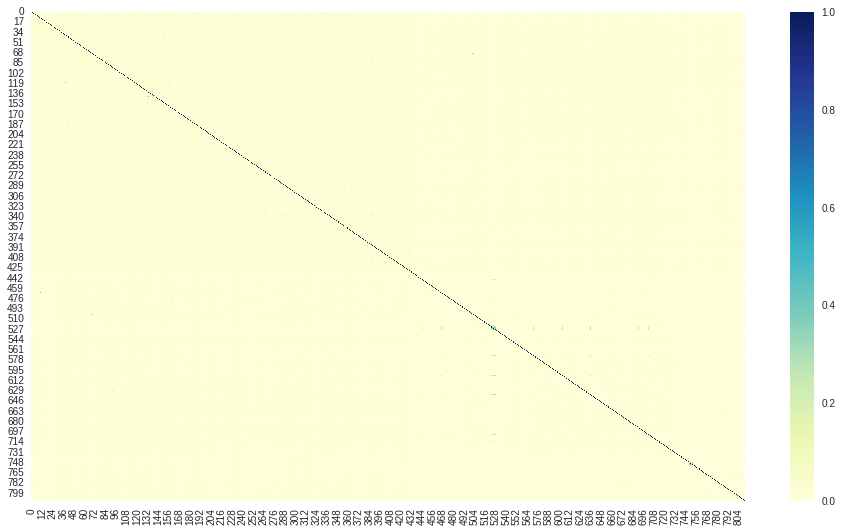

In [ ]:
#Kontrolle des Ähnlichkeit nach Drop
#cosin simularity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
X = vectorizer.fit_transform(df_faketext.text)
arr = X.toarray()
cosinsimilarity_fake=cosine_similarity(arr)
create_heatmap(cosinsimilarity_fake)

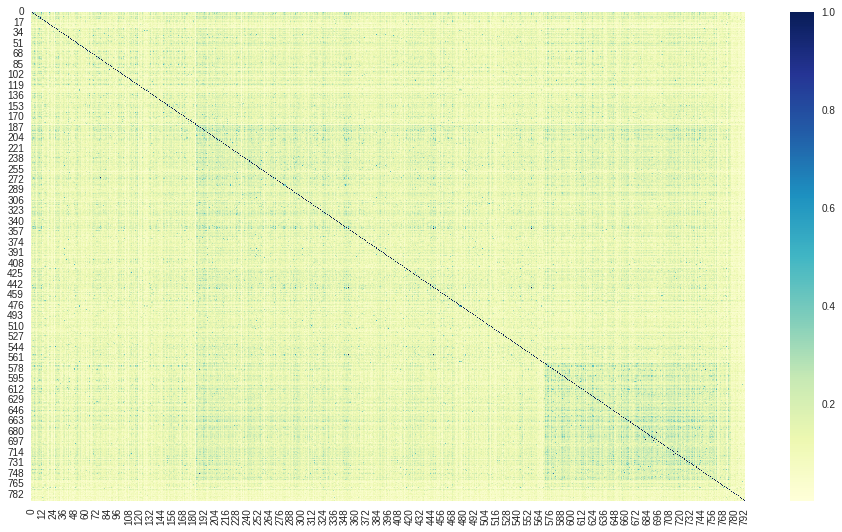

In [ ]:
#cosin simularity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(realtext)
arr = X.toarray()
cosinsimilarity_real=cosine_similarity(arr)
create_heatmap(cosinsimilarity_real)

In [ ]:
i=0
b=0
dd=0
del remover[:]
remover=[]

for bla in  cosinsimilarity_real:
    b=0
    if indnex_realtext[i] not in remover:
      for ba in bla:
        if b!=i:
          if ba>0.5:
            if indnex_realtext[b] not in remover:
              remover.append(indnex_realtext[b])
        b=b+1
    i=i+1
for dd in remover:
  df_realtext=df_realtext.drop(dd)

print(len(remover), "Werte wurden entfernt")
diff_df = diff_df.append(df_realtext)

39 Werte wurden entfernt


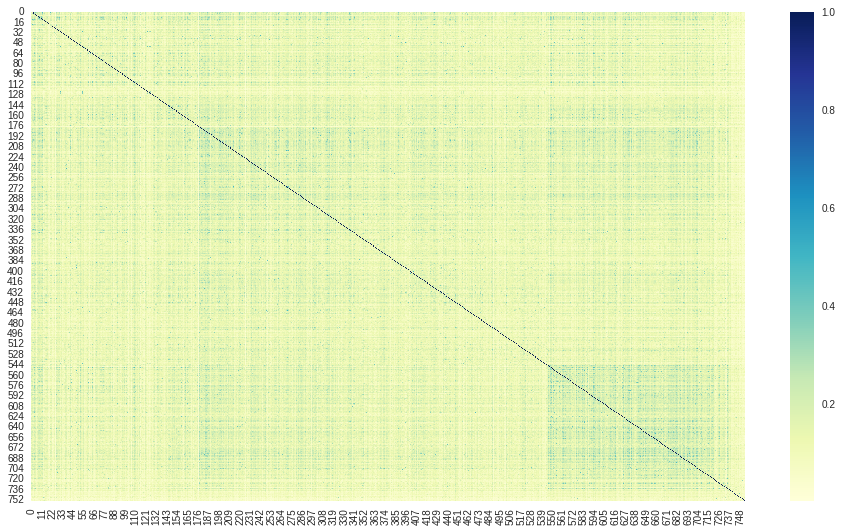

In [ ]:
#Kontrolle des Ähnlichkeit nach Drop
#cosin simularity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_realtext.text)
arr = X.toarray()
cosinsimilarity_real=cosine_similarity(arr)
create_heatmap(cosinsimilarity_real)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


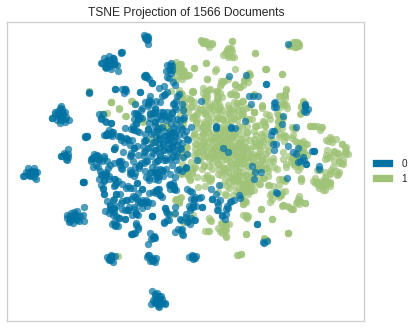

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = diff_df
cv_bla= TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))

X = cv_bla.fit_transform(corpus.text)
y = corpus.fake

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


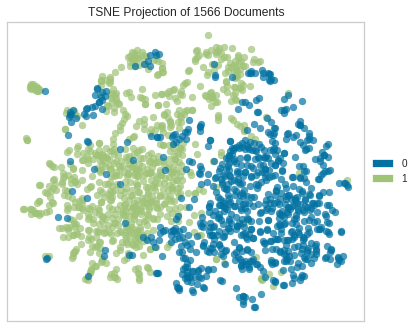

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = diff_df
cv_bla=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))

X = cv_bla.fit_transform(corpus.text)
y = corpus.fake

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('df_ba_optimzized.csv')
!mv df_ba_optimzized.csv "/content/drive/MyDrive/BA/Project/df_ba_optimzized.csv"